In [1]:
import numpy as np
import scipy.io
import os
import scipy.stats
import matplotlib.pyplot as plt

In [2]:
os.chdir('../Wehbe')
path_to_fmri = '/gpfs/milgram/scratch/chun/hf246/wehbe_fmri/'
sub = '1'
f = scipy.io.loadmat(path_to_fmri + 'subject_' + sub + '.mat')

In [3]:
time = f['time']
empty_inds = []
[sum(time[:,1]==i) for i in range(1,5)]

[340, 352, 279, 380]

In [4]:
f['data'].shape

(1351, 37913)

In [5]:
for run in range(1,5):
    run_inds = np.where(time[:,1]==run)[0]
    empty_inds.extend(run_inds[0:12])
    empty_inds.extend(run_inds[-2:])

In [6]:
time.shape

(1351, 2)

In [7]:
nonempty_time = np.array([time[i,:] for i in range(time.shape[0]) if i not in empty_inds])

In [8]:
nonempty_data = np.array([f['data'][i] for i in range(len(f['data'])) if i not in empty_inds])

In [9]:
nonempty_data.shape

(1295, 37913)

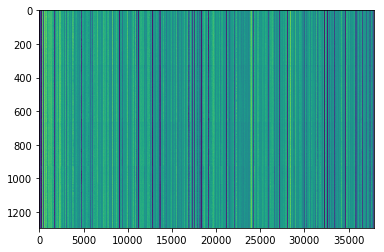

In [10]:
plt.imshow(nonempty_data, aspect="auto")

In [11]:
nonempty_data.max()

1108

In [12]:
data_zscored = np.zeros(nonempty_data.shape)
for run in range(1,5):
    data_zscored[nonempty_time[:,1]==run,:] = scipy.stats.zscore(nonempty_data[nonempty_time[:,1]==run,:], axis=0)

/gpfs/milgram/project/chun/hf246/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2253: RuntimeWarning: divide by zero encountered in true_divide
  return (a - mns) / sstd
/gpfs/milgram/project/chun/hf246/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2253: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


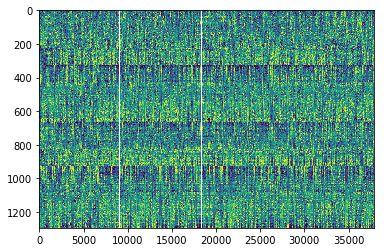

In [13]:
plt.imshow(data_zscored, aspect='auto', vmin=-2, vmax=2)

In [14]:
# na's from no activity
nonempty_data = np.nan_to_num(data_zscored)

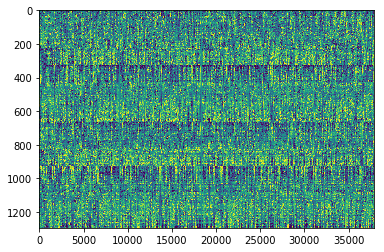

In [15]:
plt.imshow(nonempty_data, aspect='auto', vmin=-2, vmax=2)

In [18]:
print(np.mean(nonempty_data[nonempty_time[:,1]==4, 2344])) #random voxel
print(np.std(nonempty_data[nonempty_time[:,1]==4, 2344]))

-2.562613145364296e-15
1.0000000000000018
